### Dataset Description:

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
It includes over 4,000 records and 15 attributes.
Each attribute is a potential risk factor.

Features:

1. **Sex** | *binary* | 0 - woman, 1 - male |
2. **Age** | *int* | in years |
3. **Current Smoker** | *binary* |
4. **Cigs Per Day** | *int* | the number of cigarettes that the person smoked on average in one day |
5. **BP Meds** | *binary* | whether or not the patient was on blood pressure medication |
6. **Prevalent Stroke** | *binary* | whether or not the patient had previously had a stroke |
7. **Prevalent Hyp** | *binary* | whether or not the patient was hypertensive |
8. **Diabetes** | *binary* | whether or not the patient had diabetes |
9. **Tot Chol** | *int* | total cholesterol level |
10. **Sys BP** | *float* | systolic blood pressure |
11. **Dia BP** | *float* | diastolic blood pressure |
12. **BMI**: | *float* | Body Mass Index |
13. **Heart Rate** | *int* |
14. **Glucose** | *int*|: glucose level

Predict variable (desired target)

* 10 year risk of coronary heart disease CHD | *binary* |


In [132]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [133]:
dataset = pd.read_csv('./dataset.csv', sep=',')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Dataset Preprocessing

In [135]:
dataset.drop('education', axis = 1, inplace = True)
dataset.isnull().sum()
dataset.dropna(axis = 0, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


### Dataset Visualization

In [136]:
dataset_copy = dataset.copy()
dataset_copy.rename(columns={'male': 'Sex'}, inplace = True)
dataset_copy['Sex'] = dataset_copy['Sex'].replace({0: 'Female', 1: 'Male'})
dataset_copy.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:xlabel='Sex', ylabel='age'>

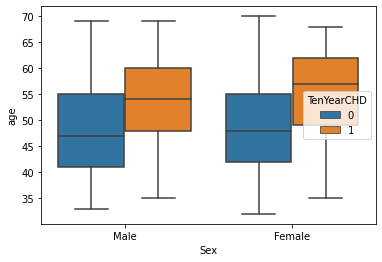

In [137]:
sns.boxplot(x = 'Sex', y = 'age', data = dataset_copy, hue = 'TenYearCHD')

<AxesSubplot:xlabel='Sex', ylabel='totChol'>

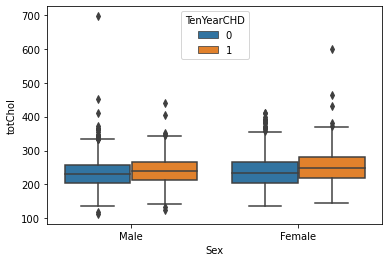

In [138]:
sns.boxplot(x = 'Sex', y = 'totChol', data = dataset_copy, hue = 'TenYearCHD')

<AxesSubplot:xlabel='Sex', ylabel='heartRate'>

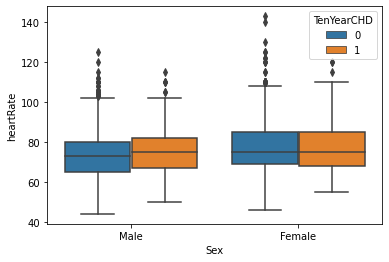

In [139]:
sns.boxplot(x = 'Sex', y = 'heartRate', data = dataset_copy, hue = 'TenYearCHD')

<AxesSubplot:xlabel='Sex', ylabel='glucose'>

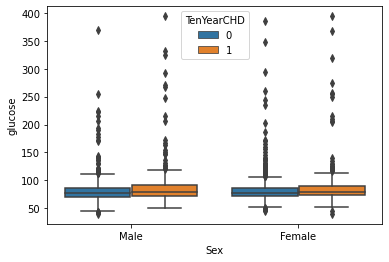

In [140]:
sns.boxplot(x = 'Sex', y = 'glucose', data = dataset_copy, hue = 'TenYearCHD')

<AxesSubplot:xlabel='Sex', ylabel='BMI'>

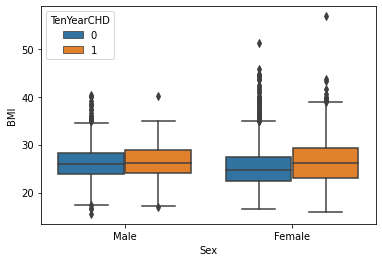

In [141]:
sns.boxplot(x = 'Sex', y = 'BMI', data = dataset_copy, hue = 'TenYearCHD')

<AxesSubplot:xlabel='Sex', ylabel='sysBP'>

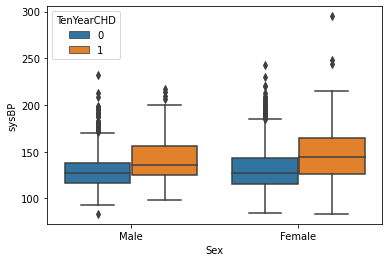

In [142]:
sns.boxplot(x = 'Sex', y = 'sysBP', data = dataset_copy, hue = 'TenYearCHD')

<AxesSubplot:xlabel='Sex', ylabel='diaBP'>

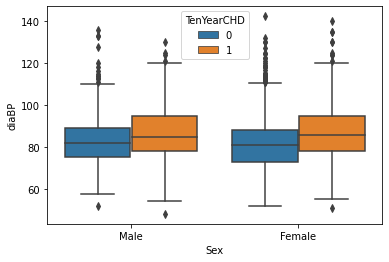

In [143]:
sns.boxplot(x = 'Sex', y = 'diaBP', data = dataset_copy, hue = 'TenYearCHD')

### The correlation between TenYearCHD(label) and the other columns(features)

In [144]:
correlation=dataset.corr()
correlation['TenYearCHD']
correlation_data = pd.Series(correlation['TenYearCHD']).to_frame()
correlation_data.sort_values(by='TenYearCHD',ascending=False)

,TenYearCHD
TenYearCHD,1.000000
age,0.231414
sysBP,0.220170
prevalentHyp,0.178779
diaBP,0.149206
glucose,0.124071
male,0.096056
diabetes,0.093190
totChol,0.089408
BPMeds,0.084704


## Predictions

### Spliting and Scaling The Data

In [145]:
#droping the columns that have lower correlation with the label
X=dataset.drop(['TenYearCHD','cigsPerDay','prevalentStroke','heartRate','currentSmoker'], axis=1)
X.isnull().sum()

male            0
age             0
BPMeds          0
prevalentHyp    0
diabetes        0
totChol         0
sysBP           0
diaBP           0
BMI             0
glucose         0
dtype: int64

In [146]:
y=dataset['TenYearCHD']
y.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

In [147]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1111)

### With Total Cholesterol

#### Logistic Regression

In [148]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression precision: {}'.format(round(precision_score(y_test,y_pred),2)))
print('Logistic Regression accuracy: {}'.format(round(accuracy_score(y_test,y_pred),2)))

Logistic Regression precision: 0.61
Logistic Regression accuracy: 0.86


#### Random Forest

In [149]:
rf_clf = RandomForestClassifier(n_estimators=500,max_depth=10)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('RandomForestClassifier precision: {}'.format(round(precision_score(y_test,y_pred), 2)))
print('RandomForestClassifier pccuracy: {}'.format(round(accuracy_score(y_test,y_pred), 2)))

RandomForestClassifier precision: 0.5
RandomForestClassifier pccuracy: 0.85


### Without Total Cholesterol

In [150]:
X=dataset.drop(['TenYearCHD','totChol','cigsPerDay','prevalentStroke','heartRate','currentSmoker'], axis=1)
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1111)


#### Logistic Regression

In [151]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression precision: {}'.format(round(precision_score(y_test,y_pred), 2)))
print('Logistic Regression accuracy: {}'.format(round(accuracy_score(y_test,y_pred), 2)))

Logistic Regression precision: 0.6
Logistic Regression accuracy: 0.86


#### Random Forest

In [152]:
rf_clf = RandomForestClassifier(n_estimators=500,max_depth=10)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('RandomForestClassifier precision: {}'.format(round(precision_score(y_test,y_pred),2)))
print('RandomForestClassifier pccuracy: {}'.format(round(accuracy_score(y_test,y_pred),2)))

RandomForestClassifier precision: 0.67
RandomForestClassifier pccuracy: 0.86
